In [2]:
import pandas as pd
wines=pd.read_csv("/Users/VickyWu/Desktop/wine-reviews/winev2.csv",encoding='latin-1')
wines.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÌÊ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OÛªKeefe,@kerinokeefe,Nicosia 2013 VulkÌÊ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineåÊ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineåÊ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Question1 Histogram of the ratings of wine

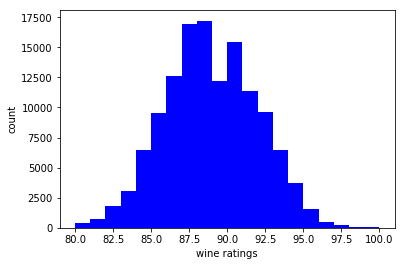

In [4]:
import matplotlib.pyplot as plt
plt.hist(wines["points"],bins=20,color="blue")
plt.xlabel("wine ratings")
plt.ylabel("count")
plt.show()

# Q2 Barplot average scores grouped by wine type

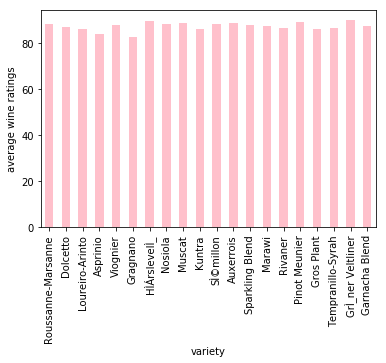

In [6]:
df1=wines.groupby(["variety"])["points"].mean()
#plot 20 varities 
df1.sample(n=20).plot(kind="bar", color="pink")
plt.ylabel("average wine ratings")
plt.show()

# Q3 Scatter plot showing mean scores of wine type and number of reviews

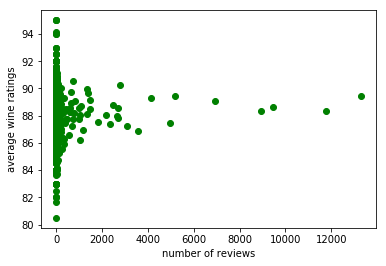

In [159]:
wine_by_points=wines.groupby(["variety"])[["points"]].mean()
wine_by_number_of_reviews=wines.groupby(['variety'])['variety'].count()
plt.scatter(x=wine_by_number_of_reviews, y=wine_by_points, color="green")
plt.xlabel("number of reviews")
plt.ylabel("average wine ratings")
plt.show()

# Q4 Pie chart showing type of wines by percentage reviewed

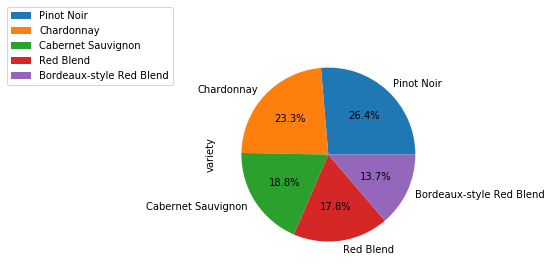

In [230]:
import numpy as np
#plot 5 wine types
slices=wines.groupby(['variety'])['variety'].count().sort_values(ascending=False)[:5]
slices.plot.pie(autopct='%1.1f%%')
plt.legend(loc="center left", bbox_to_anchor=(-1,1))
plt.show()

# Q5 Who reviewed the most wine?

In [139]:
ds=wines.groupby(["taster_name"])["taster_name"].count()

print(ds.idxmax())


Roger Voss


# Q6 Top 10 wine reviewers by twitter handle

In [269]:
wines.taster_twitter_handle.value_counts().sort_values(ascending=False)[:10]

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwineåÊ         9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
Name: taster_twitter_handle, dtype: int64

# Q7 Average price of wine by country

In [9]:
ds2=wines.groupby(['country'])['price'].mean()
ds2.sort_values()

country
Ukraine                    9.214286
Bosnia and Herzegovina    12.500000
India                     13.333333
Armenia                   14.500000
Bulgaria                  14.645390
Romania                   15.241667
Macedonia                 15.583333
Slovakia                  16.000000
Cyprus                    16.272727
Moldova                   16.745763
China                     18.000000
Peru                      18.062500
Georgia                   19.321429
Morocco                   19.500000
Chile                     20.786458
Greece                    22.364425
Luxembourg                23.333333
Brazil                    23.765957
Czech Republic            24.250000
Serbia                    24.500000
Argentina                 24.510117
Turkey                    24.633333
South Africa              24.668987
Slovenia                  24.812500
Croatia                   25.450704
Portugal                  26.218256
Uruguay                   26.403670
Mexico              

# Q8 Which 10 varieties were mostly reviewed, show a barplot


Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'RosÌ©', 'Merlot'],
      dtype='object', name='variety')


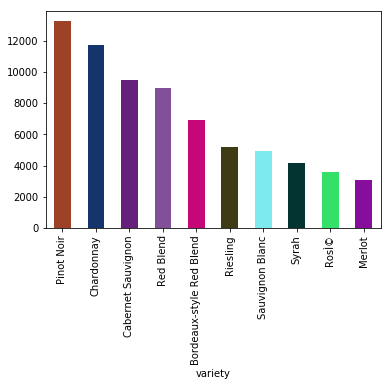

In [11]:
import matplotlib.pyplot as plt
ds3=wines.groupby(['variety'])["variety"].count().sort_values(ascending=False)[0:10]
print(ds3.index)
colors=np.random.sample((10,3))
ds3.plot(kind="bar", color=colors)
plt.show()

# Q9 Which variety has the highest ratings (by means); Which variety is the most expensive and which is the least expensive (by means)?

In [156]:
wines_average_ratings=wines.groupby(["variety"])["points"].mean()
print("The highest rated wine is:" + wines_average_ratings.idxmax())
wines_price=wines.groupby(["variety"])["price"].mean()
print("The most expensive wine is:" + wines_price.idxmax())
print("The cheapeast wine is:" + wines_price.idxmin())

The highest rated wine is:Gelber Traminer
The most expensive wine is:Ramisco
The cheapeast wine is:Trajadura


# Q10 Find out the means of price for each country’s wine and plot the means 

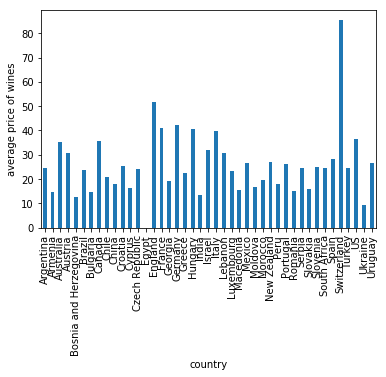

In [162]:
wineprice_country=wines.groupby(["country"])["price"].mean()
wineprice_country.plot(kind="bar")
plt.ylabel("average price of wines")
plt.show()

# Q11 Find out the mean of wine ratings for each variety grouped by province and list the best rated wine variety for each province.

In [146]:
#Method1
points=wines.groupby(["province", "variety"]).points.mean().groupby(['province']).agg(["max","idxmax"])
points
#Method2
x=wines.groupby(["province", "variety"]).points.mean()
x_df = x.unstack()
x_df.agg(["max","idxmax"],axis=1)
#Method3 
means=wines.groupby(['province','variety'],as_index=False).points.mean()
means.sort_values(['province','points'],ascending=[1,0]).groupby('province').head(1)

,province,variety,points
2,Achaia,RosÌ©,90.000000
5,Aconcagua Costa,CarmenÌ¬re,90.000000
10,Aconcagua Valley,Bordeaux-style Red Blend,91.800000
28,Aegean,Okuzgozu,92.000000
35,Agioritikos,Red Blend,87.000000
39,Ahr,SpÌ_tburgunder,91.000000
40,Alenquer,Portuguese Red,87.666667
48,Alentejano,Arinto,91.000000
80,Alentejo,Touriga Nacional,93.000000
83,Alenteo,Portuguese White,88.000000


# Q11 Scatter plot the mean of wine points and the mean wine prices and adjust the size of the bubble by the mean price of that variety (the more expensive the bigger the bubble), add colors

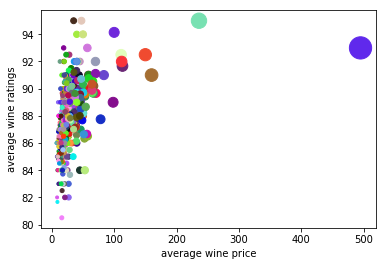

In [171]:
x=wines.groupby(['variety'])['price'].mean()
y=wines.groupby(['variety'])['points'].mean()
s=wines.groupby(['variety'])['price'].mean()
colors=np.random.sample((len(x),3))
plt.scatter(x=x,y=y,s=s,color=colors)
plt.xlabel("average wine price")
plt.ylabel("average wine ratings")
plt.show()


# Q12 If you want to open a winery in California and you want to stock 5 best rated wines under than $50, which 5 wines will you choose? Show the wines’ titles, description, region1 and variety

In [147]:
wines_cali=wines.loc[wines.province=="California"]
cheap_wine_cali=wines_cali.loc[wines_cali.price<50]
caliwine_ratings=cheap_wine_cali.sort_values("points",ascending=False)
#print(caliwine_ratings.iloc[0:5])
best5_cheap_cali=caliwine_ratings.iloc[0:5]
best5_cheap_cali[['title','description','region_1','variety']]

,title,description,region_1,variety
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,"Shows classic, full-throttle notes of tropical...",Sonoma Coast,Chardonnay
114981,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,A seriously top of the heap California Syrah. ...,El Dorado,Syrah
15851,Stolo 2014 Estate Syrah (San Luis Obispo County),This is possibly the most savory rendition of ...,San Luis Obispo County,Syrah
26892,Iron Horse 2012 Wedding CuvÌ©e Estate Bottled ...,An offering meant to toast all manner of celeb...,Green Valley,Sparkling Blend
34505,Williams Selyem 2007 Late Harvest Muscat (Russ...,"The winery's philosophy is, if you're going to...",Russian River Valley,Muscat
